# Descripción del Proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. 

Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas.
Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.


Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

(Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.)
El dataset contiene la abreviatura ESRB. The Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Diccionario de datos
— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género)

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)

— EU_sales (ventas en Europa en millones de dólares estadounidenses)

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Clasificación (ESRB)

Es posible que los datos de 2016 estén incompletos.

# Inicializacíon

## Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import plotly.express as px

## Lectura de datos

In [2]:
data = pd.read_csv("/datasets/games.csv")

In [3]:
data.info()
print(" ")
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
 


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Preparacíon de datos

En este punto hemos observado algunas cosas que queremos cambiar en nuestros datos y procederemos a prepararlos para que queden listos para analizarlos.

In [4]:
#Todos los nombres de las columnas en minusculas
data.columns = ["name", "platform", "year_of_release", "genre", "na_sales", "eu_sales", "jp_sales", "other_sales", "critic_score", "user_score", "rating"]

In [5]:
#Verificamos si tenemos datos duplicados
data.duplicated().sum()

0

### Valores NaN

In [6]:
#Verificamos datos ausentes
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

En este paso podemos encontrar que las ultimas tres columnas contienen grandes cantidades de valores ausentes.

In [7]:
#En esta parte decidiremos que hacer con los valores NaN
data["year_of_release"] = data["year_of_release"].astype("Int64")


In [8]:
#Comprobamos que ya no detecte valores ausentes
data["year_of_release"].isna().sum()

269

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [10]:
#Verificamos los Nan de name
data["name"].isna().sum()
#verificamos los Nan de genre
data["genre"].isna().sum()

#podemos ver que los unicos Nan de name y genre coinciden en la misma fila
#procedemos a eliminar los Nan de name
data["name"].fillna("unnamed", inplace=True)
#Verificamos los Nan de name
data["name"].isna().sum()

#procedemos a eliminar los Nan de genre
data["genre"].fillna("unnamed", inplace=True)
#Verificamos los Nan de genre
data["genre"].isna().sum()

0

Tenemos 3 columnas con muchos valores ausentes y debemos descubrir que hacer con ellos para no afectar nuestro analisis y a su vez poder trabajar con los datos

In [11]:
print("valor minimo", data["critic_score"].min())
print("valor maximo", data["critic_score"].max())
data["critic_score"].head(40)

valor minimo 13.0
valor maximo 98.0


0     76.0
1      NaN
2     82.0
3     80.0
4      NaN
5      NaN
6     89.0
7     58.0
8     87.0
9      NaN
10     NaN
11    91.0
12     NaN
13    80.0
14    61.0
15    80.0
16    97.0
17    95.0
18     NaN
19    77.0
20     NaN
21     NaN
22     NaN
23    97.0
24    95.0
25     NaN
26    77.0
27     NaN
28    95.0
29    88.0
30     NaN
31     NaN
32    87.0
33     NaN
34    83.0
35    83.0
36    94.0
37    88.0
38    97.0
39    93.0
Name: critic_score, dtype: float64

En la columna de "critic_score" hemos buscado el valor minimo y maximo y hemos verificado que es un puntaje que se le da al juego y suponemos que este esta comprendido entre 0-100. por lo que consideramos que podemos sustituir los valores NaN por un valor promedio para continuar con el analisis.

<AxesSubplot:>

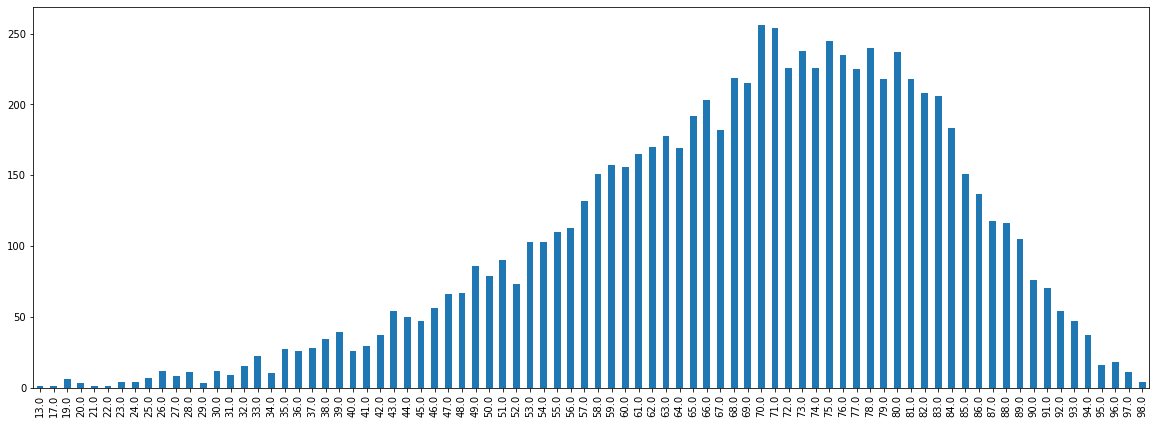

In [12]:
#Hacemos un grafico para verificar que podemos colocar un valor promedio en los valores ausentes.
data["critic_score"].value_counts().sort_index().plot(kind="bar", figsize=[20, 7])

In [13]:
#buscamos el valor promedio
data["critic_score"].mean()

68.96767850559173

In [14]:
#Trabajamos los datos Nan
data['critic_score'] = data['critic_score'].apply(pd.to_numeric, errors='coerce')

In [15]:
#verificamos nuevamente los valores ausentes
data["critic_score"].isna().sum()

8578

<AxesSubplot:>

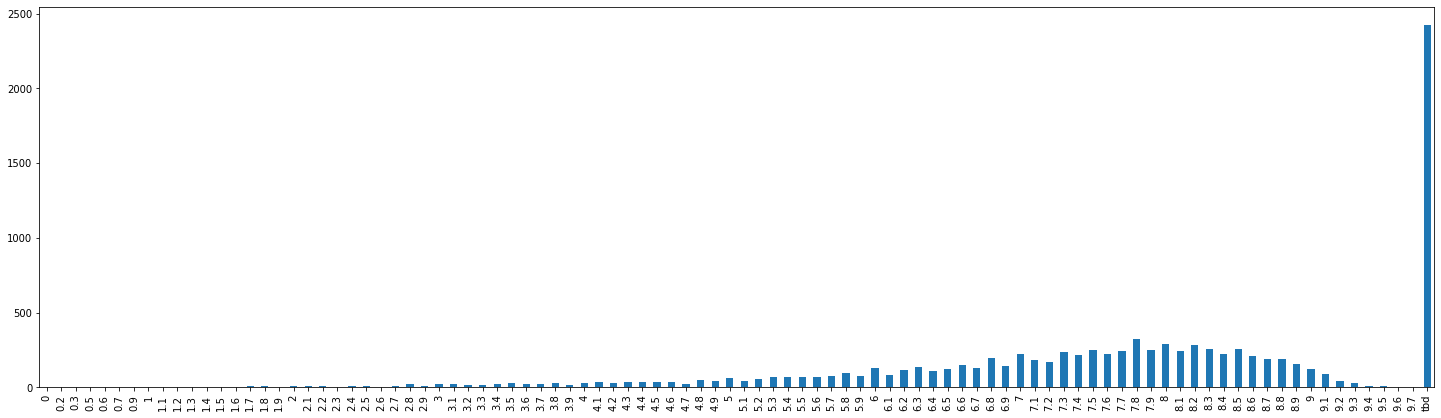

In [16]:
#Aqui vamos a ver un grafico de las puntuaciones

data["user_score"].value_counts().sort_index().plot(kind="bar", figsize=[25, 7])

In [17]:
#Cambiamos el tipo de dato a float

data['user_score'] = data['user_score'].apply(pd.to_numeric, errors='coerce')

#verificamos el nuevo contenido
data['user_score']


0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

In [18]:
#Verificamos los datos nuevamente
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


<AxesSubplot:>

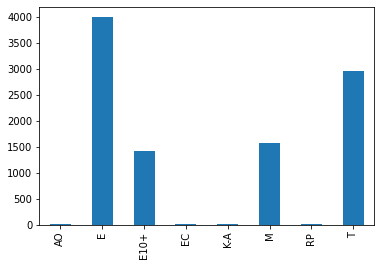

In [19]:
#Realizamos un grafico de la ultima columna con NaN
data["rating"].value_counts().sort_index().plot(kind="bar")

<AxesSubplot:>

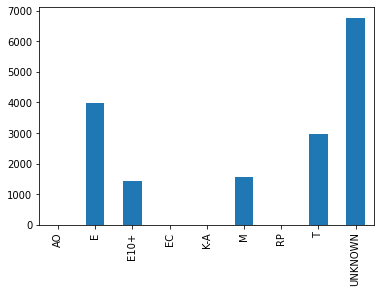

In [20]:
#sustituimos NaN por "UNKNOWN"
data["rating"] = data["rating"].fillna("UNKNOWN")
#mostramos el grafico nuevamente para ver el impacto de llenar los faltantes con la palabra "UNKNOWN"
data["rating"].value_counts().sort_index().plot(kind="bar")

En este caso particular tenemos clasificaciones de los juegos, dentro de las mismas clasificaciones tenemos una categoria que es para los juegos que no han sido clasificados que es la columna RP "Rating Pending" asi que moveremos toda la columna que ahora es UNKNOWN a RP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


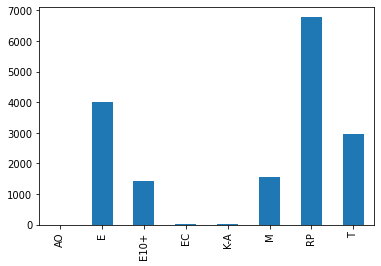

In [21]:
#moveremos toda la columna que ahora es UNKNOWN a RP
data["rating"] = data["rating"].replace("UNKNOWN", "RP")
#miramos el grafico nuevamente a ver como queda
data["rating"].value_counts().sort_index().plot(kind="bar")
#vemos como queda el DF al final de los cambios
data.info()


### Resumen de solucion de NaN

Nos encontramos 3 columnas con valores NaN diferentes

La primera columna que critic_score la trabajamos utilizando un rango de puntuaciones donde segun nuestro grafico estaba el mayor cumulo de puntuaciones para hacer entonces un "promedio" mas amplio.

la segunda columna fue user_score y en esa se dejaron los valores nan por ser demasiados y se convirtieron los datos en tipo float

y en la tercera se modifico el nombre de NaN a RP ya que segun las calificaciones de juegos tenemos una calificacion para los que no tienen calificacion.

### Enriquecimiento de datos

In [22]:
#En esta parte creare la nueva columna con el total de las ventas 

#PREGUNTA PARA EL TUTOR
#porque no pude hacerlo de la manera normal que es la siguiente que esta comentada

#data["total_sales"] = data['na_sales'] + data['eu_sales'] + data["jp_sales"] + data["other_sales"]

data["total_sales"] = data[['na_sales', 'eu_sales', "jp_sales", "other_sales"]].sum(axis=1)

In [23]:
#chequeamos como queda ahora nuestro dataframe
data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


In [24]:
#verificamos la nueva columna
data["total_sales"]


0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

# Analisis de datos

## Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?


<AxesSubplot:>

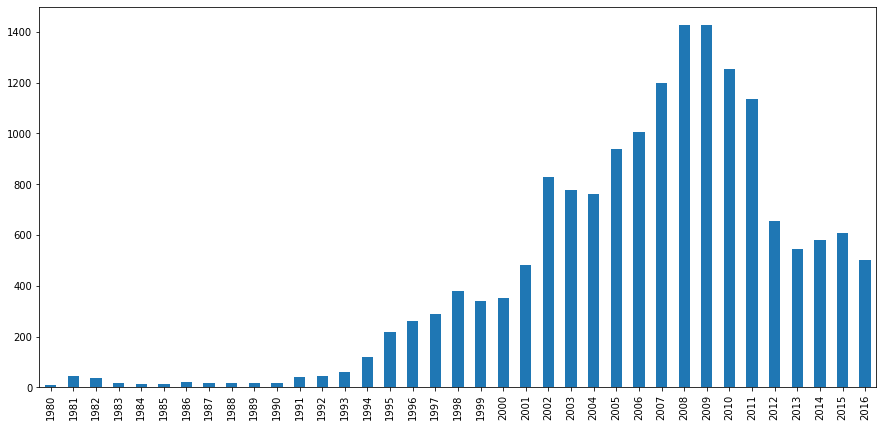

In [25]:
data["year_of_release"].value_counts().sort_index().plot(kind="bar", figsize=[15, 7])

Podemos ver que entre 2007 y 2011 hubo una gran cantidad de lanzamientos, por encima del resto de los años

## Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

<AxesSubplot:xlabel='platform'>

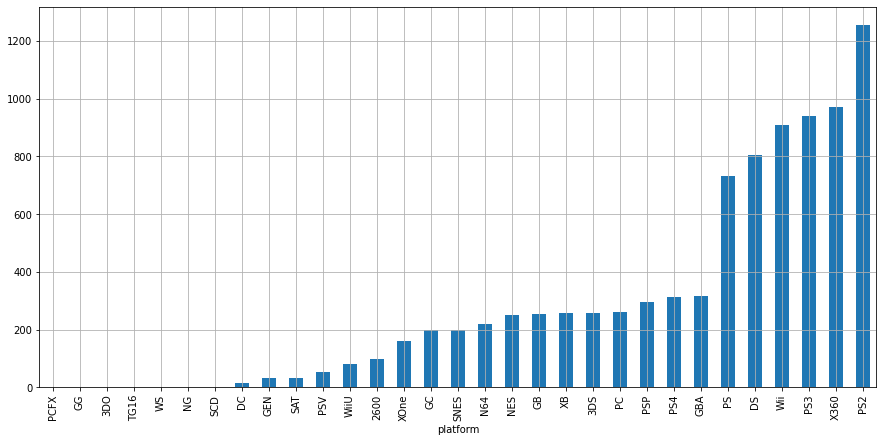

In [26]:
#ventas totales por plataforma

data.groupby("platform")["total_sales"].sum().sort_values().plot(kind="bar", figsize=[15, 7], grid="on")

<AxesSubplot:xlabel='platform,year_of_release'>

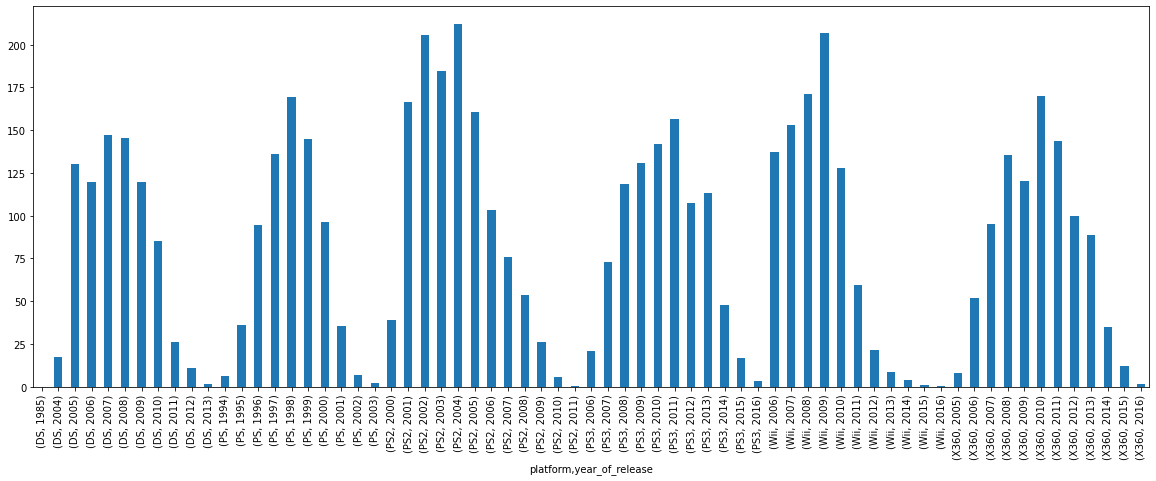

In [27]:
#plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año
top_platform = ['PS', 'DS', 'Wii', 'PS3', 'PS2', 'X360']
top_platform_sale = data[data['platform'].isin(top_platform)]
top_platform_sale.groupby(["platform", "year_of_release"])["total_sales"].sum().plot(kind="bar", figsize=[20, 7])

<AxesSubplot:xlabel='year_of_release'>

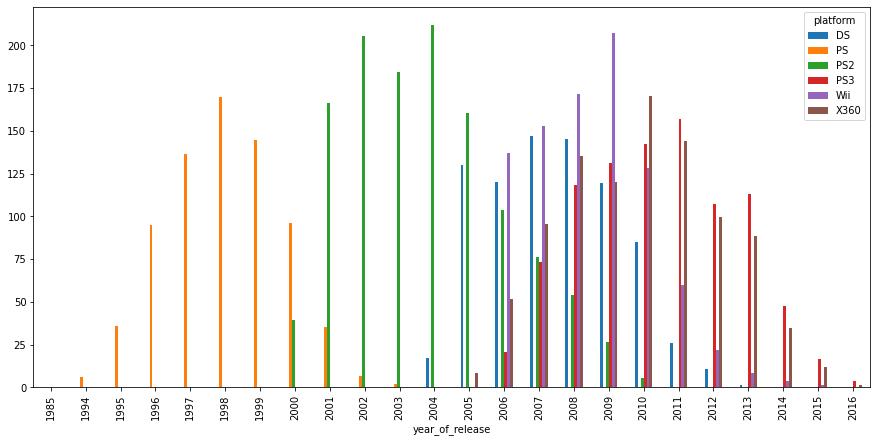

In [28]:
top_sales_year = top_platform_sale.pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")
top_sales_year_plot = top_sales_year.plot(kind="bar", figsize=[15,7])
top_sales_year_plot

En los dos graficos anteriores podemos observar la distribucion del total de las ventas de las mejores pltaformas a traves de los años.

In [29]:
#Busca las plataformas que solían ser populares pero que ahora no tienen ventas.
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
top_sales_year

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


Por medio de nuestro ultimo grafico podemos dar respuesta a las dos preguntas que se nos plantean a continuacion.

Las plataformas mas populares antes era PS y PS2

PS fue la plataforma mas popular desde 1994 hasta el 2000 para un total de 7 años
PS2 fue la plataforma mas popular desde 2001 hasta 2005 para un total de 5 años

Hasta este momento parecia no haber mucha competencia, luego del año 2006 es un poco diferente.

Entre el año 1994 y 2005 las plataformas tenian una transicion de al menos 5 años(periodo en el que aparecia una y desaparecia otra, aunque ps no desaparicio totalmente hasta el 2003)

Luego vino el auge del nintendo Wii. este tuvo su aparicion en 2006, alcanzando su mayor popularidad en el año 2009 siendo la mas popular de todas, esta plataforma tuvo una popularidad alta durante 5 años pero hasta el 2016 aun se muestra entre nuestros graficos, eso quiere decir que aunque su popularidad bajo mucho con respecto a otros años aun no ha desaparecido.

El ps3 aparece en 2005 pero no es hasta 2011 que alcanza su mayor popularidad y liderazgo en el mercado.

En definitiva podemos decir que las plataformas tienen un promedio de tiempo de entre 5 y 10 años en aparecer y las antiguas en desaparecer.

y de las plataformas que antes era populares y ahora desaparecieron completamente tenemos a PS, PS2 y DS

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

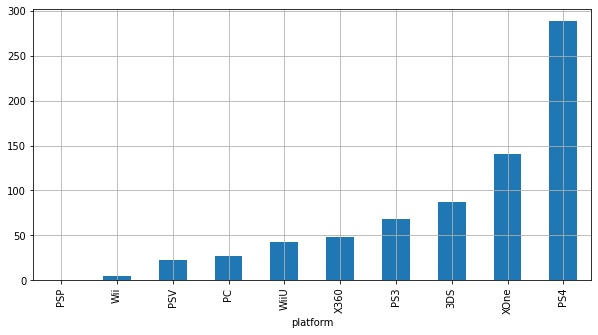

In [30]:
data_from_2014 = data[data["year_of_release"] >= 2014]


plot_top_platform_sale_from_2014 = data_from_2014.groupby("platform")["total_sales"].sum().sort_values().plot(kind="bar", figsize=[10, 5], grid="on")


Segun el comportamiento de los datos analisados anteriormente en el top de plataformas mas vendidas diria que el modelo para el 2017 seria el lanzamiento de una nueva consola de playstation que le de nuevamente popularidad y sustituya la anterior justo como ocurrio con ps ps2 y ps3

Ds y wii son parte de Nintendo asi que podria decir que Nintendo tambien tendria algo innovador en el mercado para estar al dia y poder dar competencia como lo hizo en los años anteriores.

Y aunque no hay una trayectoria antes de xbox360 en mi modelo de ventas para el 2017 diria que xbox tambien se actualizaria y tendria un buen producto para competir con los otros grandes de la industria.


## ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [31]:
top_platform_sale_from_2014 = data_from_2014.groupby("platform")["total_sales"].sum().sort_values()
top_platform_sale_from_2014.sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

Teniendo en cuenta los datos anteriores y los datos a partir del 2014 podemos afirmar que las plataformas en aumento son:
PS4
XOne
3DS
WiiU
Y las plataformas que se reducen son:
PS3
X360
Wii

## Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

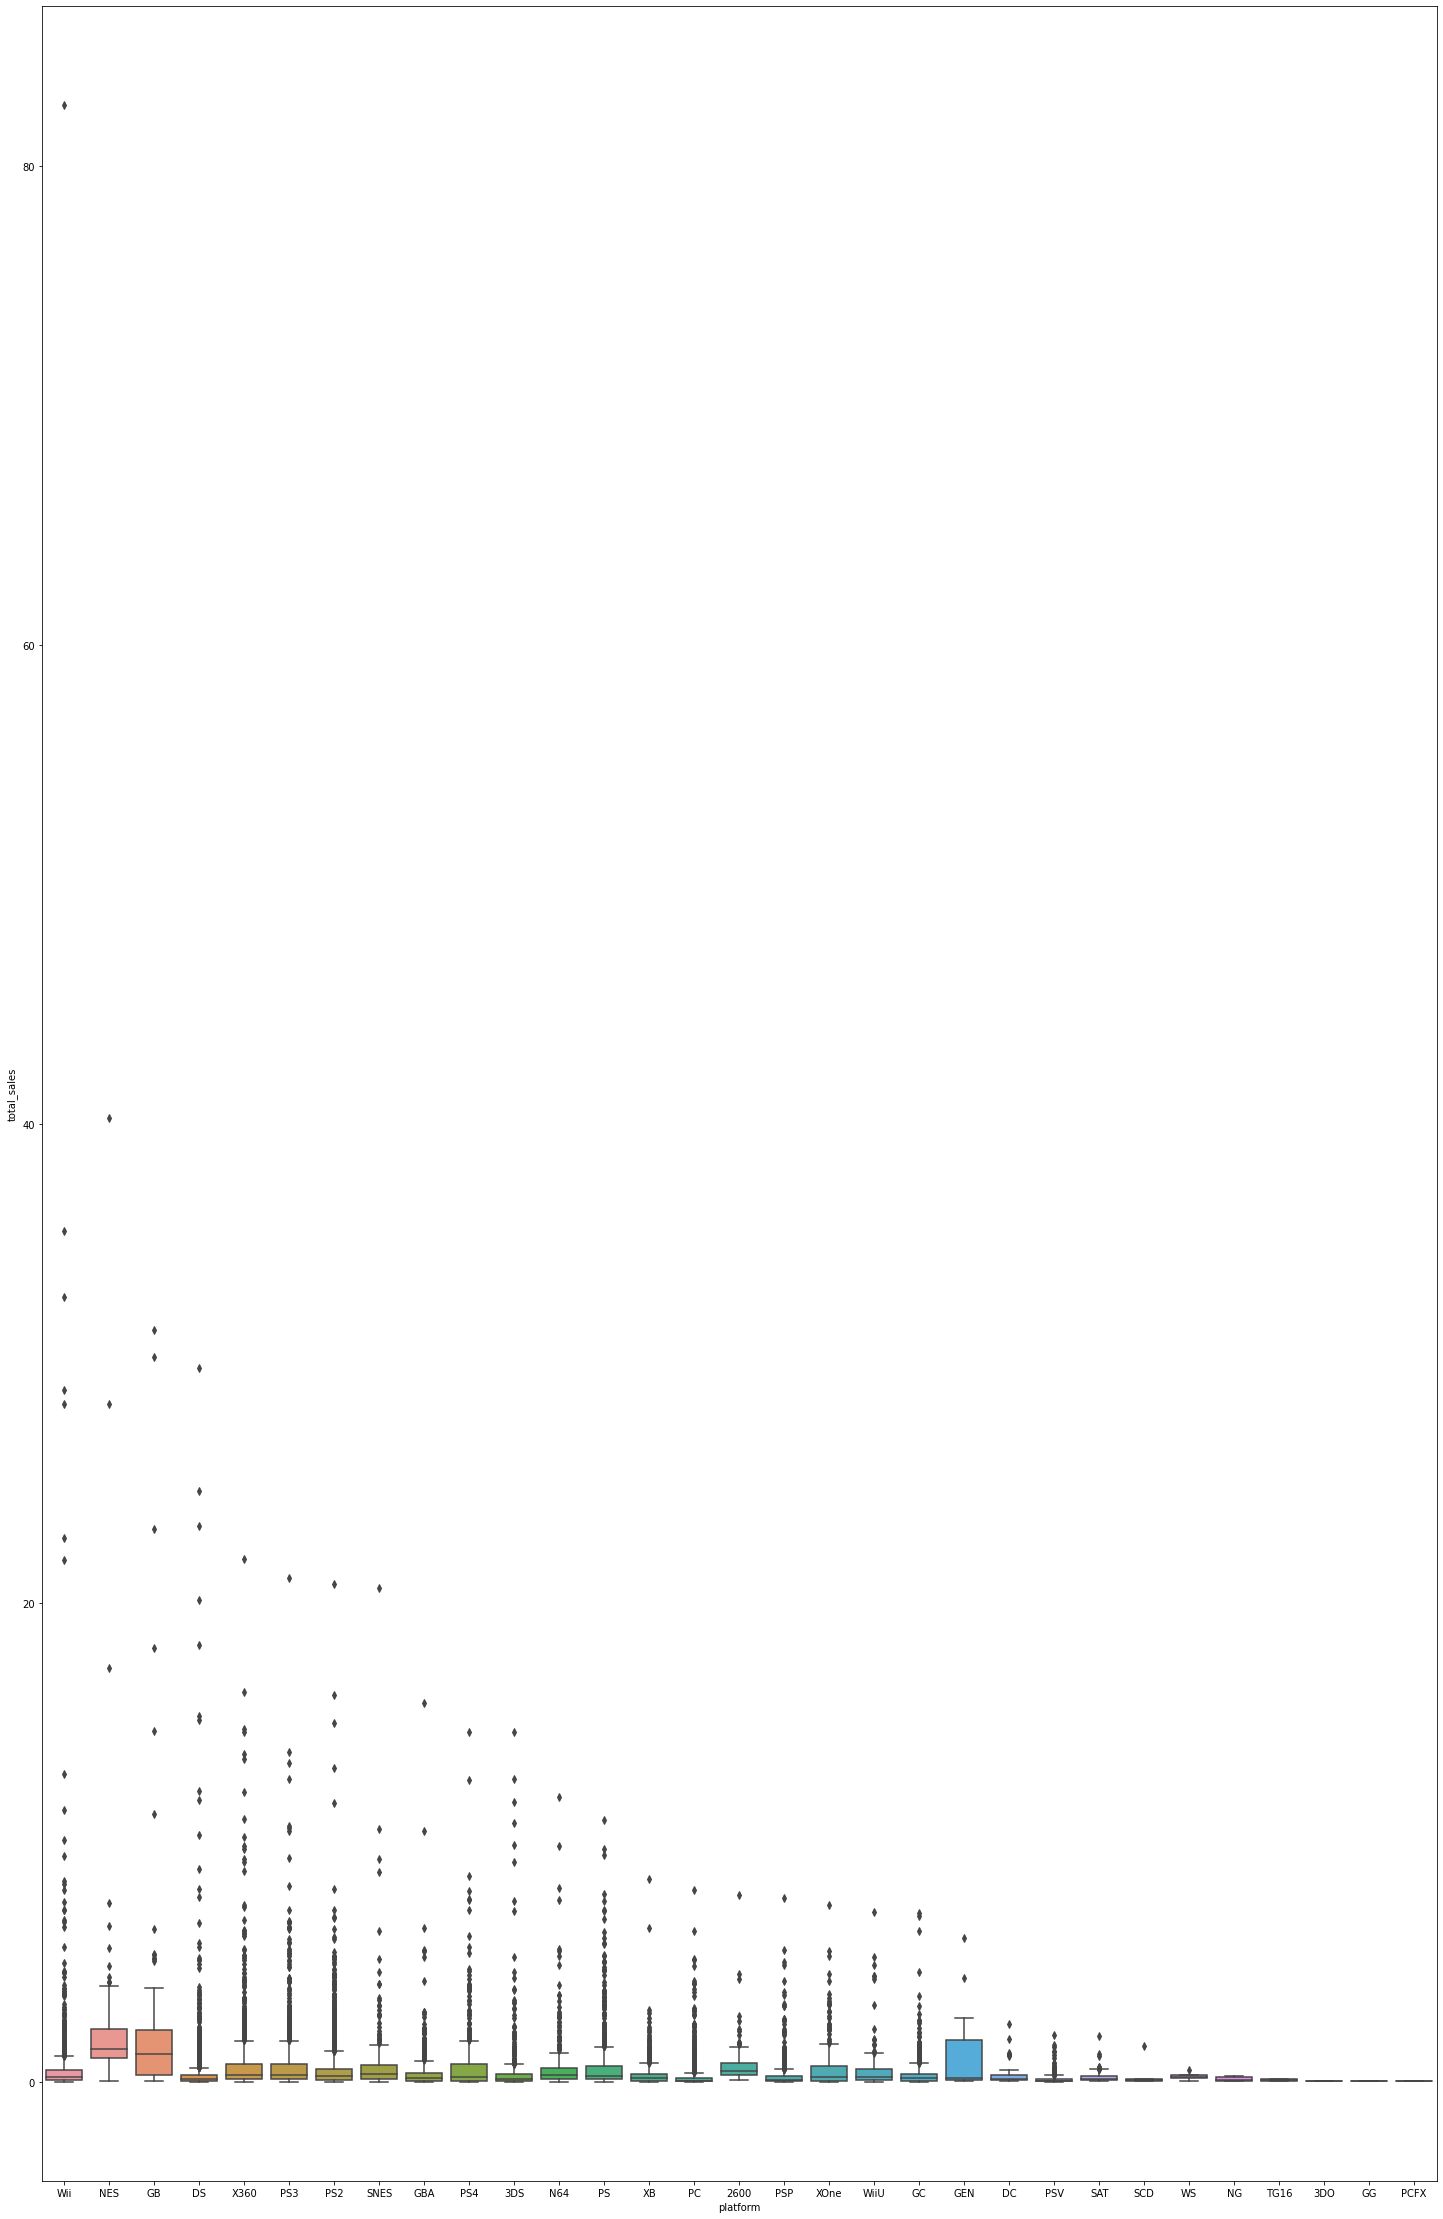

In [32]:
fig, ax = plt.subplots(figsize = (25, 40))
box_plot = sns.boxplot(x = data['platform'],
            y = data['total_sales'], ax=ax)

En esta parte nos preguntan si son significativas las diferencias de las ventas, segun lo que puedo apreciar si hay diferencias significativas entre las plataformas y las ventas.
Aunque podemos ver tambien que el promedio de ventas de varias plataformas esta al rededor de cero.



## Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

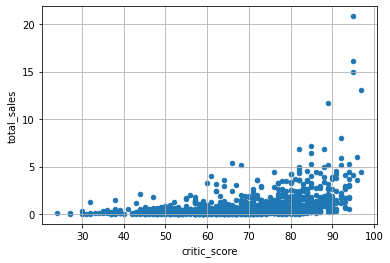

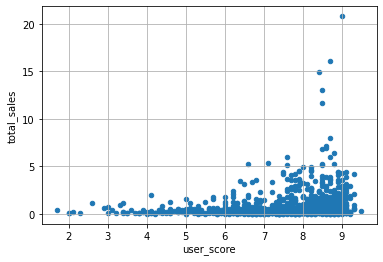

In [33]:
my_platform = data.query("platform == 'PS2'")
my_platform.plot(x="critic_score", y="total_sales", kind="scatter", grid="on")
my_platform.plot(x="user_score", y="total_sales", kind="scatter", grid="on")

Luego de ver ambos graficos con varios tamaños diferentes, creo que el mejor tamaño o con el que se me hace mas facil de comprender y analizar es el original, ya que asi puedo visualizar con mas facilidad el resultado.

In [34]:
my_platform[["critic_score", "total_sales"]].corr()

,critic_score,total_sales
critic_score,1.000000,0.395435
total_sales,0.395435,1.000000


In [35]:
my_platform[["user_score", "total_sales"]].corr()

,user_score,total_sales
user_score,1.000000,0.172866
total_sales,0.172866,1.000000


Segun los datos analisados anteriormente podemos decir que existe una correlacion positiva.

Quiere decir esto que los comentarios de los usuarios y profesionales afectan directamente sobre las ventas.

## Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [36]:
data[data["name"] == 'Grand Theft Auto: San Andreas'][["name", "platform", "total_sales", "critic_score", "user_score"]]

,name,platform,total_sales,critic_score,user_score
17,Grand Theft Auto: San Andreas,PS2,20.81,95.0,9.0
875,Grand Theft Auto: San Andreas,XB,1.96,93.0,8.6
2115,Grand Theft Auto: San Andreas,PC,0.97,93.0,8.9
10311,Grand Theft Auto: San Andreas,X360,0.11,NaN,7.5


Comparando ahora la nueva informacion vemos que aunque los comentarios de los usuarios y profesionales son mayormente positivo no tienen el mismo impacto en una plataforma que en otra

## Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [37]:
top_sales_by_genre = data.groupby("genre")["total_sales"].sum().sort_values(ascending=False)
top_sales_by_genre


genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
unnamed            2.42
Name: total_sales, dtype: float64

Podemos decir que en general los generos mas vendidos son:


Action


Sports


Shooter

Creo que si podemos generalizar los generos con ventas altas y bajas, ya que en casi todas las plataformas 
se comportan de la misma manera, teniendo los mismos generos en altas y bajas ventas.

In [38]:
na_sales = data_from_2014.groupby("genre")["na_sales"].sum().sort_values(ascending=False)
na_sales
#En norteamerica los 3 generos mas populares son shooter, action y sports

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Fighting        12.43
Racing           8.74
Platform         6.79
Adventure        5.64
Simulation       2.63
Strategy         0.98
Puzzle           0.65
Name: na_sales, dtype: float64

In [39]:
eu_sales = data_from_2014.groupby("genre")["eu_sales"].sum().sort_values(ascending=False)
eu_sales
#En europa coinciden los mismos 3 generos como los mas populares

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Misc            12.86
Simulation       7.30
Platform         6.80
Fighting         6.69
Adventure        6.49
Strategy         1.79
Puzzle           0.52
Name: eu_sales, dtype: float64

In [40]:
jp_sales = data_from_2014.groupby("genre")["jp_sales"].sum().sort_values(ascending=False)
jp_sales
#En japon solo tenemos dos tipos de generos que son realmente populares y son Role_playing y Action.

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Adventure        3.60
Sports           3.26
Platform         2.69
Simulation       2.31
Racing           1.76
Strategy         0.95
Puzzle           0.93
Name: jp_sales, dtype: float64

<AxesSubplot:xlabel='genre'>

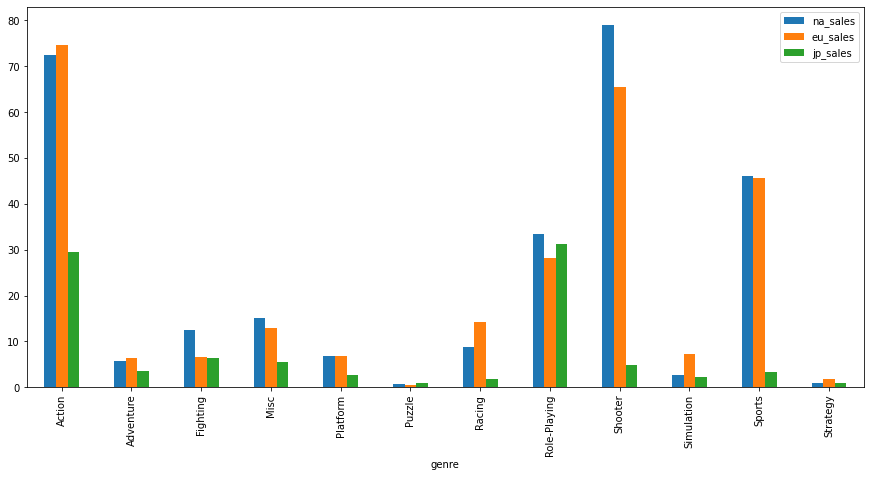

In [41]:
data_from_2014.groupby("genre")[["na_sales", "eu_sales", "jp_sales"]].sum().sort_index().plot(kind="bar", figsize=[15, 7])

# Hipotesis

##  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [42]:
xone_mean = data_from_2014.query("platform == 'XOne'")
xone_mean = xone_mean["user_score"].dropna()

In [43]:
pc_mean = data_from_2014.query("platform == 'PC'")
pc_mean = pc_mean["user_score"].dropna()

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas

## Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [44]:
action_mean = data_from_2014.query("genre == 'Action'")
action_mean = action_mean["user_score"].dropna()
action_mean.mean()

6.760606060606061

In [45]:
sport_mean = data_from_2014.query("genre == 'Sports'")
sport_mean = sport_mean["user_score"].dropna()
sport_mean.mean()

5.2251968503937

 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes si son diferentes

## Establece tu mismo el valor de umbral alfa.

In [46]:
alpha =.05

## Cómo formulaste las hipótesis nula y alternativa.

### Planteamiento de hipotesis (pregunta 5.1)

La hipotesis nula: No, no hay diferencia entre los promedios comparados


la hipótesis alternativa: podría afirmar que las calificaciones promedio por usuarios son diferente

### Planteamiento de hipotesis (pregunta 5.2)

la hipótesis nula: podría afirmar que las calificaciones promedio por usuarios son diferente

La hipotesis alternativa: No, no hay diferencia entre los promedios comparados



## Prueba de hipotesis

### Prueba de hipotesis 5.4.1

  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [47]:
#definimos alpha
alpha = 0.05
#Aplicamos ttest
results = st.ttest_ind(xone_mean, pc_mean, equal_var=False)
print("valor p:", results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

valor p: 0.11601398086668827
No podemos rechazar la hipotesis nula


### Prueba de hipotesis 5.4.2

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [48]:
#definimos alpha
alpha = 0.05
#Aplicamos ttest
results = st.ttest_ind(action_mean, sport_mean, equal_var=False)
print("valor p:", results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

valor p: 1.1825550382644557e-14
Rechazamos la hipotesis nula


## Qué criterio utilizaste para probar las hipótesis y por qué

Utilice una prueba de hipotesis de dos colas para obtener uno u otro resultado.


Y en la ttest usé ind ya que las variables eran independientes.

# Paso 6. Escribe una conclusión general

A lo largo de este entretenido proyecto he podido tener las siguientes observaciones:

* Podemos ver que entre 2007 y 2011 hubo una gran cantidad de lanzamientos, por encima del resto de los años

* Las plataformas tienen un promedio de tiempo de entre 5 y 10 años en aparecer y las antiguas en desaparecer.

* Hay diferencias significativas entre las plataformas y las ventas
 
* Pensamos que los comentarios de los usuarios y profesionales afectan directamente sobre las ventas, aunque comparando el mismo juego en diferente plataformas vemos que los comentarios de los usuarios y profesionales son mayormente positivos y aun asi no tienen el mismo impacto en una plataforma que en otras.
 
* Action, Sports, Shooter son los generos mas vendidos.

* Con respecto a las hipotesis, podemos decir de la primera que no podemos rechazar la hipotesis nula ya que no tenemos suficiente evidencia para afirmar que las medias no son iguales

* Y en el caso de la segunda. rechazamos la hipotesis nula, ya que segun nuestros calculos los promedios por usuarios son diferentes.
